# Business problems:
1. What are the most popular **game**, **genre**, **publisher**, and **platform** of all time?
2. What are the most popular **game** in **each region** (i.e. North America, Europe, and Japan)?
3. What is the trend of video games' global sales of all time?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales

In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
print(df['Platform'].value_counts().head(5))
print(df['Platform'].nunique())
print(df['Publisher'].value_counts().head(5))
print(df['Publisher'].nunique())
print(df['Genre'].value_counts().head(5))
print(df['Genre'].nunique())

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
31
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64
578
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
12


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


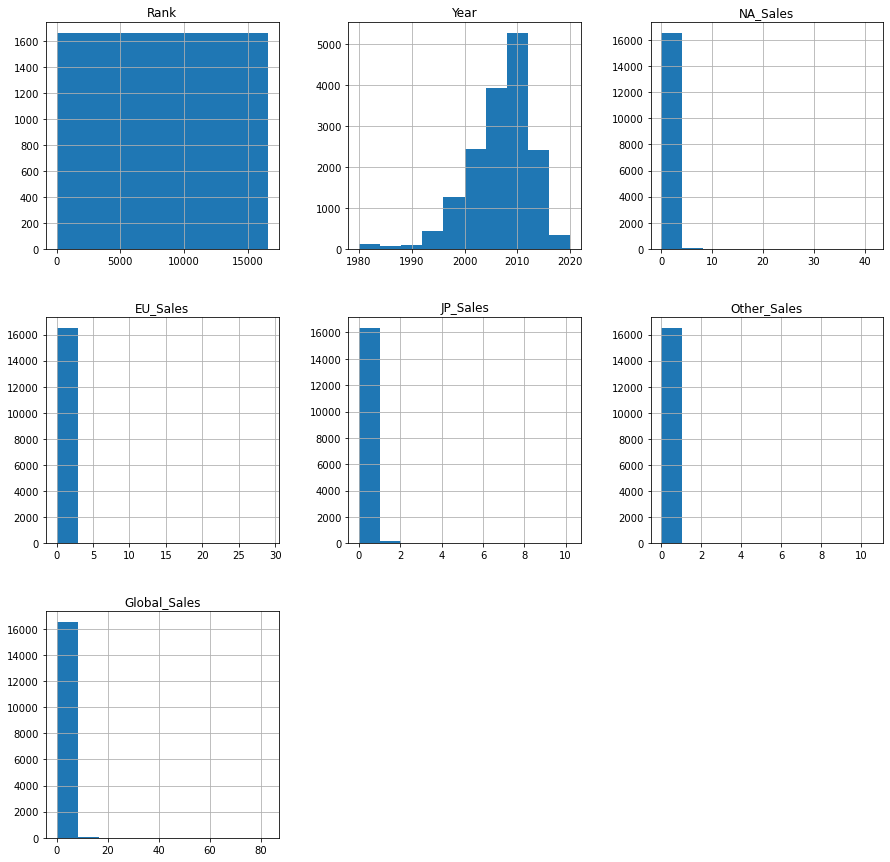

(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [5]:
df.hist(figsize=(15,15))
plt.show()
print(df.shape)
print(df.columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


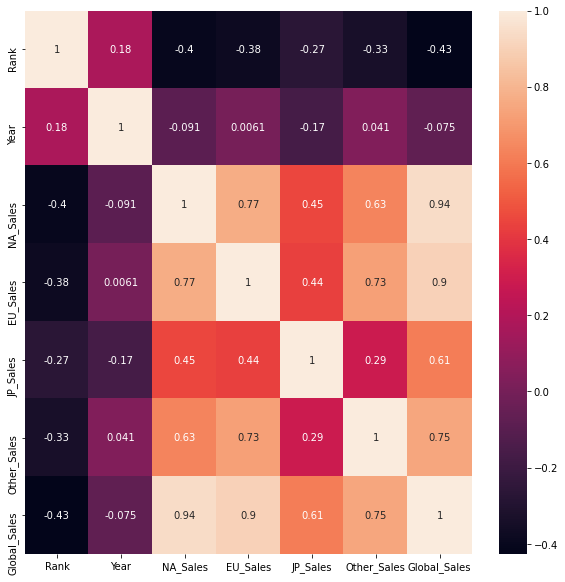

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

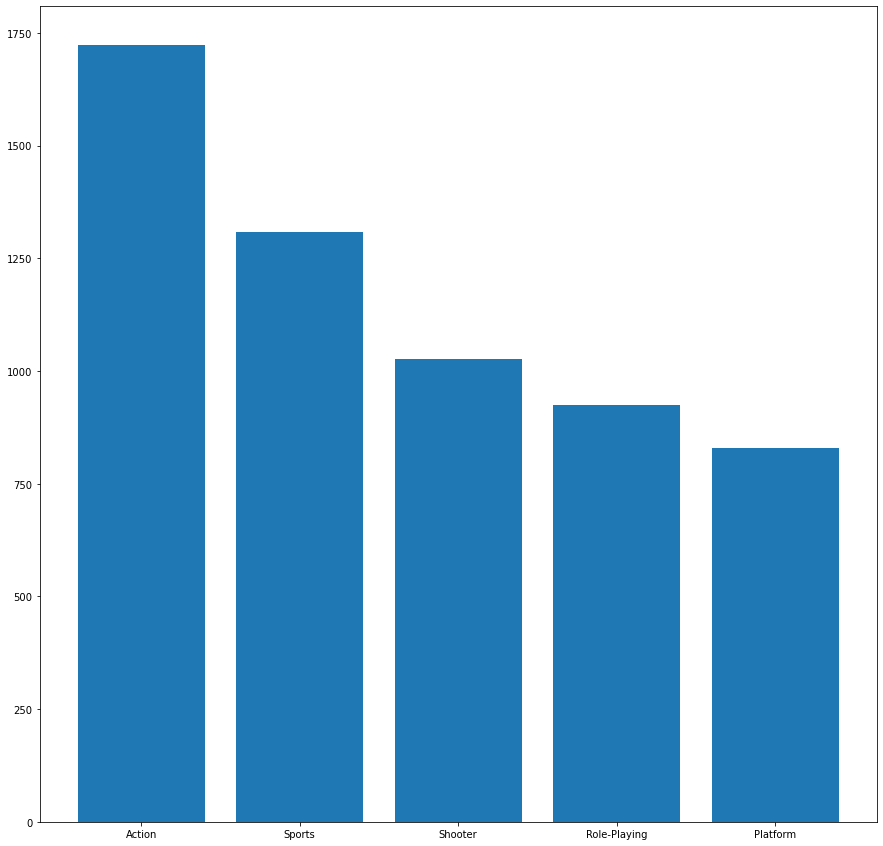

In [12]:
x = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(15,15))
plt.bar(x.index,x)
plt.show()

In [13]:
df['Year'] = df['Year'].astype(int)

In [14]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# What are the most popular **game**, **genre**, **publisher**, and **platform** of all time?

In [15]:
regionals = ['NA_Sales', 'EU_Sales', 'JP_Sales']
aspects = ['Platform', 'Genre', 'Publisher']
for i in regionals:
    for j in aspects:
        k = df.groupby(j)[i].sum().sort_values(ascending=False).head(1)
        display(k)

Platform
X360    594.33
Name: NA_Sales, dtype: float64

Genre
Action    861.77
Name: NA_Sales, dtype: float64

Publisher
Nintendo    815.75
Name: NA_Sales, dtype: float64

Platform
PS3    340.47
Name: EU_Sales, dtype: float64

Genre
Action    516.48
Name: EU_Sales, dtype: float64

Publisher
Nintendo    418.3
Name: EU_Sales, dtype: float64

Platform
DS    175.02
Name: JP_Sales, dtype: float64

Genre
Role-Playing    350.29
Name: JP_Sales, dtype: float64

Publisher
Nintendo    454.99
Name: JP_Sales, dtype: float64

In North America:
* Platform with highest sales is X360
* Genre with highest sales is Action
* Publisher with highest sales is Nintendo

In Europe:
* Platform with highest sales is PS3
* Genre with highest sales is Action
* Publisher with highest sales is Nintendo

In Japan:
* Platform with highest sales is DS
* Genre with highest sales is RPG
* Publisher with highest sales is Nintendo

Nintendo is sold highest in North America, Europe, and Japan. In North America and Europe, **Action** game are best seller, whereas in Japan, it is **RPG**. Lastly, these three regions are different in terms of **platform**. 

# What are the most popular **game** in **each region** (i.e. North America, Europe, and Japan)?

In [16]:
for i in regionals:
    display(df.sort_values(by=[i], ascending=False).head(3))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


* Most popular games in North America are: Wii Sports, Super Mario Bros, and Duck Hunt
* Most popular games in EU are: Wii Sports, Mario Kart Wii, and Wii Sports Resort
* Most popular games in Japan are: Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon SIlver, and Super Mario Bros

# What is the trend of video games' global sales of all time?

<function matplotlib.pyplot.show(*args, **kw)>

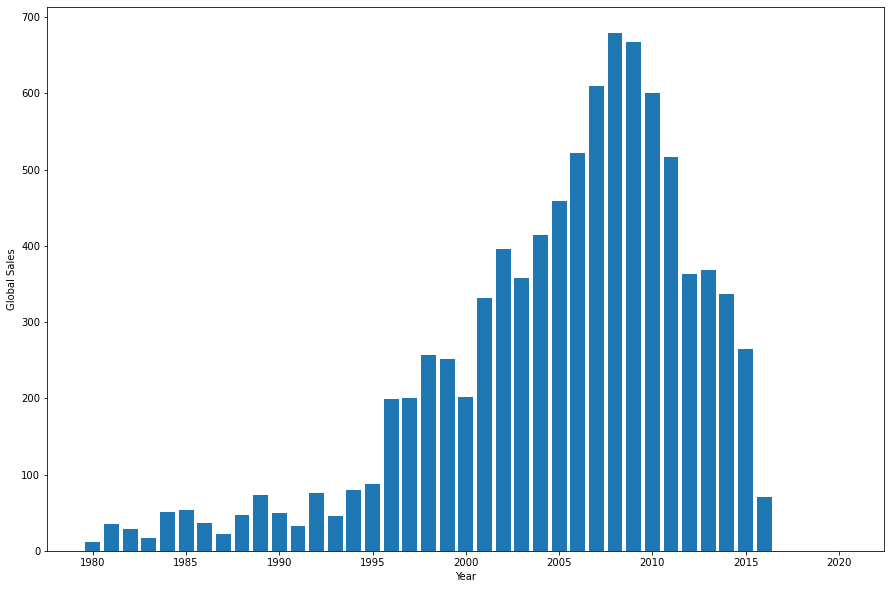

In [17]:
y = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(15,10))
plt.bar(y.index,y)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show
# The sales of video games peaked at 2008-2009